# Hands-on Project: Wing structural test

<img src="Wing1.png",width=1000,height=600>

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Placeholders for Stiffness
K_f = 100     # Flexure Stiffness
K_t = 25      # Torsion Stifness
L = 50        # Lenght [cm]


## What do we want to test?

We would like to estimate the $\textbf{flexure rigidity}$ $K_f$, in other words the $\textbf{stifness}$ against flexure torques. In the elastic regime, the response of the structure against a flexure load is linear, with a constant of proportionality $K_f$:

\begin{equation}
M_f = F L = K_f \Delta y
\end{equation}

So if we apply a force $F$ which induces a flexure torque $M_f$ on the wing structure (of length $L$) the vertical displacement $\Delta y$ will depend on how stiff $K_f$ our structure is. 

The way we can estimate this constant in a real life experiment is by examining the response of the structure against different values of the load $F$. For each value of the force applied, we measure the vertical displacement of the wing. If we plot the values, they should look like this:

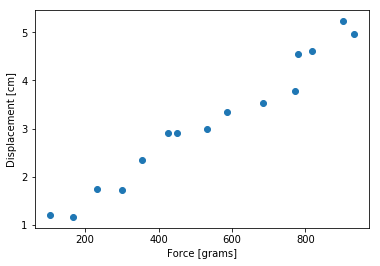

In [84]:
N = 15
force = np.linspace(100, 1000, N)
e_force = np.random.uniform(low=0.9, high=1.05, size=N)
force *= e_force

delta_y = np.linspace(1., 5., N)
e_delta = np.random.uniform(low=0.9, high=1.1, size=N)
plus_delta = np.random.uniform(low=-0.25, high=0.25, size=N)
delta_y = e_delta * delta_y + plus_delta

plt.figure()
plt.scatter(force, delta_y)
plt.xlabel('Force [grams]')
plt.ylabel('Displacement [cm]')
plt.show()

It should be fairly linear. Obviously due to several sources of error our measurements are inaccurate. This means that our results will be contaminated with noise

## Can you think of some possible sources of error?

Our main error contributions in this experiment are uncertainties in the $\textbf{force}$ applied (we are not using precise weights, but water bottles) and uncertainties in the $\textbf{displacement}$ we measure (we are eye-balling with a measure tape).

Assuming we know a rough estimate of the errors, for instance:

"We can measure distances to $\pm 0.5$ cm" or "We know how much water we put up to $\pm 25$ grams"

We can incorporate that into error bars and have a more realistic plot 

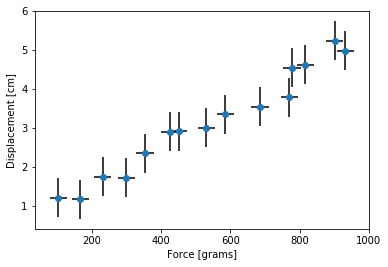

In [85]:
y_error = 0.5    # Assumed error [cm]
F_error = 25     # Assumed error [grams]

plt.figure()
plt.errorbar(force, delta_y, xerr=F_error, yerr=y_error, 
             fmt='o', ecolor='Black')
plt.xlabel('Force [grams]')
plt.ylabel('Displacement [cm]')
plt.show()

## Now what do we do with the data?

So we have made all these measurements and created some cool plots, but how do we estimate our $\textbf{flexure rigidity}$ $K_f$? Well we know that, according to the elastic regime equation:

\begin{equation}
\Delta y = \frac{L}{K_f} F
\end{equation}

This is equivalent to a linear model 

\begin{equation}
y(x) = m x + n
\end{equation}

With $m=\frac{L}{K_f}$ and $n=0$. So we can use a $\textbf{linear regression}$ algorithm to fit our $\textbf{data}$ to the $\textbf{linear model}$

In [86]:
a = np.array(force)
a = a[:, np.newaxis]
b = delta_y

m1, res, rank, s = np.linalg.lstsq(a, b)
K_f1 = L / m1
print('Estimated stiffness: K_f = %.2f [grams]' %K_f1)
print('Relative stiffness: K_f/L = %.2f [grams / cm]' %(K_f1/L))

Estimated stiffness: K_f = 8844.49 [grams]
Relative stiffness: K_f/L = 176.89 [grams / cm]


Let's take a look at how well the fit matches the data

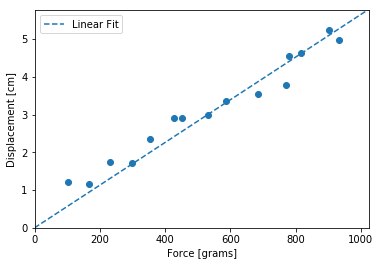

In [87]:
fake_force = np.linspace(0, 1100, N)

plt.figure()
plt.scatter(force, delta_y)
plt.plot(fake_force, fake_force * m1, linestyle='--', label='Linear Fit')
plt.xlabel('Force [grams]')
plt.ylabel('Displacement [cm]')
plt.xlim([0, 1.1*np.max(force)])
plt.ylim([0, 1.1*np.max(delta_y)])
plt.legend()
plt.show()